In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from datetime import datetime
from shapely.geometry import Point
from geopandas.tools import geocode
from geopandas.tools import reverse_geocode

%matplotlib inline

In [2]:
location1="datasets/hurricaneMichael.csv"

In [3]:
hurricane_df=pd.read_csv(location1)
hurricane_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,10/6/2018 17:00,18.0,86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 16:50,Beven
1,1A,10/6/2018 20:00,18.3,86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 19:32,Avila
2,2,10/6/2018 23:00,18.8,86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 22:38,Avila
3,2A,10/7/2018 2:00,18.4,87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/7/2018 1:38,Berg
4,3,10/7/2018 5:00,18.6,86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/7/2018 4:53,Berg


In [22]:
hurricane_df['Long']=0-hurricane_df['Long']

In [23]:

hurricane_df['coordinates']=list(hurricane_df[['Long','Lat']].values)


In [24]:
hurricane_df.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster,coordinates
0,1,10/6/2018 17:00,18.0,-86.6,30,1006,NW at 6 MPH (325 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 16:50,Beven,"[-86.6, 18.0]"
1,1A,10/6/2018 20:00,18.3,-86.6,30,1004,N at 6 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 19:32,Avila,"[-86.6, 18.3]"
2,2,10/6/2018 23:00,18.8,-86.6,30,1004,N at 7 MPH (360 deg),Potential Tropical Cyclone,Fourteen,10/6/2018 22:38,Avila,"[-86.6, 18.8]"
3,2A,10/7/2018 2:00,18.4,-87.1,35,1004,NW at 5 MPH (320 deg),Potential Tropical Cyclone,Fourteen,10/7/2018 1:38,Berg,"[-87.1, 18.4]"
4,3,10/7/2018 5:00,18.6,-86.9,35,1004,NNW at 3 MPH (340 deg),Tropical Depression,FOURTEEN,10/7/2018 4:53,Berg,"[-86.9, 18.6]"


In [25]:
hurricane_df['coordinates']=hurricane_df['coordinates'].apply(Point)

In [26]:
filepath="datasets/US_states(5m).json"

In [27]:
map_df=gpd.read_file(filepath)
map_df.head()
map48 = map_df.loc[map_df['NAME'].isin(['Alaska', 'Hawaii', 'Puerto Rico']) == False]

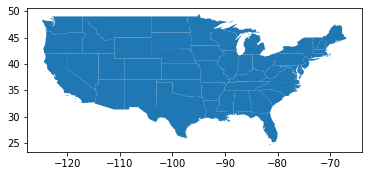

In [28]:
map48.plot()

In [29]:
geo_hurricane=gpd.GeoDataFrame(hurricane_df,geometry='coordinates')

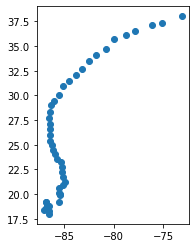

In [30]:
geo_hurricane.plot()

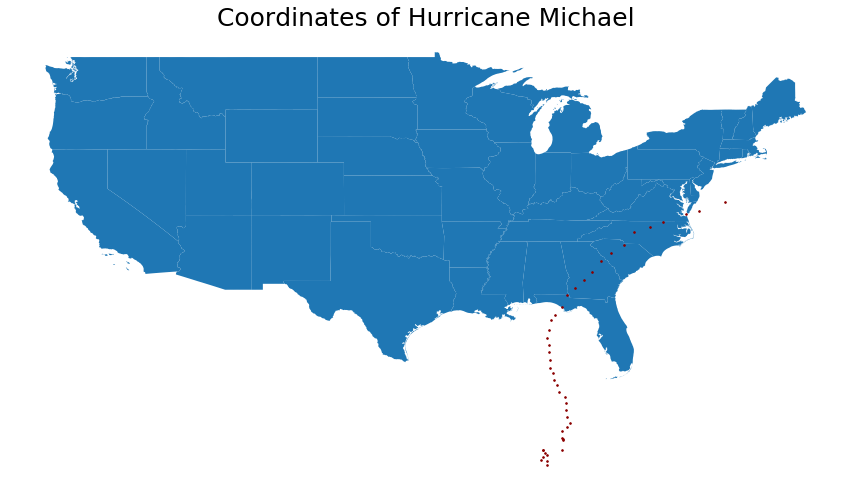

In [34]:
#set size of the borders
fig,ax=plt.subplots(1,figsize=(15,10))

#this is the map
basemap=map48.plot(ax=ax)

#take off axis numbers
ax.axis('off')

#put title on map
ax.set_title("Coordinates of Hurricane Michael",fontsize=25,fontweight=3)
    
#plot coordinates on top of map graph
geo_hurricane.plot(ax=basemap,color='darkred',marker=".",markersize=10)
